# Analysis of Recife Vaccination Data

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv("vacinados - september 7.csv", sep = ";")

In [3]:
raw_data.head()

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1,26/07/2021,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2,04/03/2021,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1,11/02/2021,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
3,***.405.524-**,AANA MAYARA DA SILVA DE OLIVEIRA,FEMININO,PÚBLICO EM GERAL (18 a 59 anos),3 - COMIRNATY (PFIZER),FD7209,1,21/08/2021,CENTRO DE VACINAÇÃO PORTO DIGITAL
4,***.695.200-**,AANTONIO DE MELO LIMA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210093,2,31/03/2021,CENTRO DE VACINAÇÃO COMPAZ ARIANO SUASSUNA


### I noticed a new class named "sexo".

# data handling

### filtering data:

In [4]:
raw_data.columns

Index(['cpf', 'nome', 'sexo', 'grupo', 'vacina', 'lote', 'dose',
       'data_vacinacao', 'local_vacinacao'],
      dtype='object')

In [5]:
data = raw_data.loc[:, ["cpf", "grupo", "vacina", "dose", "data_vacinacao", "sexo"]]
data.head()

,cpf,grupo,vacina,dose,data_vacinacao,sexo
0,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1,26/07/2021,MASCULINO
1,***.886.964-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,04/03/2021,FEMININO
2,***.886.964-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1,11/02/2021,FEMININO
3,***.405.524-**,PÚBLICO EM GERAL (18 a 59 anos),3 - COMIRNATY (PFIZER),1,21/08/2021,FEMININO
4,***.695.200-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),2,31/03/2021,MASCULINO


### renaming vaccines:

In [6]:
data["vacina"].unique()

array(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '1 - CORONAVAC - SINOVAC (BUTANTAN)', '3 - COMIRNATY (PFIZER)',
       '4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)'], dtype=object)

In [7]:
data["vacina"] = data["vacina"].replace(["1- CORONAVAC - SINOVAC (BUTANTAN)", "1 - CORONAVAC - SINOVAC (BUTANTAN)"], "CORONAVAC")

In [8]:
data["vacina"] = data["vacina"].replace(["2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)",
                                         "3 - COMIRNATY (PFIZER)", "4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)"],
                                       
                                       ["CHADOX1NCOV-19", "COMIRNATY", "JANSSEN"])

In [9]:
data["vacina"].unique()

array(['CHADOX1NCOV-19', 'CORONAVAC', 'COMIRNATY', 'JANSSEN'],
      dtype=object)

In [10]:
data["vacina"].value_counts()

CHADOX1NCOV-19    825829
CORONAVAC         554833
COMIRNATY         319207
JANSSEN            60117
Name: vacina, dtype: int64

### renaming groups:

In [11]:
data["grupo"].unique()

array(['TRABALHADORES INDUSTRIAIS E BANCÁRIOS', 'TRABALHADORES DA SAÚDE',
       'PÚBLICO EM GERAL (18 a 59 anos)', 'IDOSOS',
       'TRABALHADORES DA EDUCAÇÃO', 'PESSOAS COM COMORBIDADES',
       'OUTRAS PRIORIDADES', 'CAMINHONEIROS',
       ' PÚBLICO EM GERAL - MENOR DE 18 ANOS',
       'TRABALHADORES DE TRANSPORTE COLETIVO RODOVIÁRIO',
       'TRABALHADORES DE TRANSPORTE AÉREO', 'TRABALHADORES PORTUÁRIOS',
       'TRABALHADORES DA LIMPEZA URBANA', 'PESSOAS EM SITUAÇÃO DE RUA',
       'GESTANTES E PUÉRPERAS',
       'TRABALHADORES DE TRANSPORTE METROVIÁRIO E FERROVIÁRIO',
       'TRABALHADORES DA ASSISTÊNCIA SOCIAL',
       'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE',
       'PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS',
       'GESTANTES E PUÉRPERAS - 12 A 17 ANOS',
       'PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)',
       'PESSOAS COM COMORBIDADES - 12 A 17 ANOS',
       'TRABALHADORES DE TRANSPORTE AQUAVIÁRIO'], dtype=object)

In [12]:
data["grupo"] = data["grupo"].replace(["TRABALHADORES INDUSTRIAIS E BANCÃ\x81RIOS", "TRABALHADORES DA SAÃ\x9aDE",
                                       "PÃ\x9aBLICO EM GERAL (18 a 59 anos)", "IDOSOS",
                                       "TRABALHADORES DA EDUCAÃ\x87Ã\x83O", "PESSOAS COM COMORBIDADES",
                                       "OUTRAS PRIORIDADES", "CAMINHONEIROS",
                                       " PÃ\x9aBLICO EM GERAL - MENOR DE 18 ANOS",
                                       "TRABALHADORES DE TRANSPORTE COLETIVO RODOVIÃ\x81RIO",
                                       "TRABALHADORES DE TRANSPORTE AÃ\x89REO",
                                       "TRABALHADORES DA LIMPEZA URBANA",
                                       "PESSOAS EM SITUAÃ\x87Ã\x83O DE RUA", "GESTANTES E PUÃ\x89RPERAS",
                                       "TRABALHADORES DE TRANSPORTE METROVIÃ\x81RIO E FERROVIÃ\x81RIO",
                                       "TRABALHADORES PORTUÃ\x81RIOS", "TRABALHADORES DA ASSISTÃ\x8aNCIA SOCIAL",
                                       "GESTANTES E PUÃ\x89RPERAS NÃ\x83O RESIDENTES EM RECIFE",
                                       "PESSOAS COM DEFICIÃ\x8aNCIA - 12 A 17 ANOS",
                                       "PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÃ\x9aDE)",
                                       "GESTANTES E PUÃ\x89RPERAS - 12 A 17 ANOS", "PESSOAS COM COMORBIDADES - 12 A 17 ANOS",
                                       "TRABALHADORES DE TRANSPORTE AQUAVIÃ\x81RIO"],
                                      
                                      ["TRABALHADORES INDUSTRIAIS E BANCARIOS", "TRABALHADORES DA SAUDE",
                                       "PUBLICO EM GERAL (18 a 59 anos)", "IDOSOS",
                                       "TRABALHADORES DA EDUCACAO", "PESSOAS COM COMORBIDADES",
                                       "OUTRAS PRIORIDADES", "CAMINHONEIROS",
                                       " PUBLICO EM GERAL - MENOR DE 18 ANOS",
                                       "TRABALHADORES DE TRANSPORTE COLETIVO RODOVIARIA",
                                       "TRABALHADORES DE TRANSPORTE AREO",
                                       "TRABALHADORES DA LIMPEZA URBANA",
                                       "PESSOAS EM SITUACAO DE RUA", "GESTANTES E PUERPERAS",
                                       "TRABALHADORES DE TRANSPORTE METROVIARIO E FERROVIARIO",
                                       "TRABALHADORES PORTUARIOS", "TRABALHADORES DA ASSISTENCIA SOCIAL",
                                       "GESTANTES E PUERPERAS NAO RESIDENTES EM RECIFE",
                                       "PESSOAS COM DEFICIENCIA - 12 A 17 ANOS",
                                       "PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAUDE)",
                                       "GESTANTES E PUERPERAS - 12 A 17 ANOS", "PESSOAS COM COMORBIDADES - 12 A 17 ANOS",
                                       "TRABALHADORES DE TRANSPORTE AQUAVIARIO"]
                                     )


In [13]:
data["grupo"].unique()

array(['TRABALHADORES INDUSTRIAIS E BANCÁRIOS', 'TRABALHADORES DA SAÚDE',
       'PÚBLICO EM GERAL (18 a 59 anos)', 'IDOSOS',
       'TRABALHADORES DA EDUCAÇÃO', 'PESSOAS COM COMORBIDADES',
       'OUTRAS PRIORIDADES', 'CAMINHONEIROS',
       ' PÚBLICO EM GERAL - MENOR DE 18 ANOS',
       'TRABALHADORES DE TRANSPORTE COLETIVO RODOVIÁRIO',
       'TRABALHADORES DE TRANSPORTE AÉREO', 'TRABALHADORES PORTUÁRIOS',
       'TRABALHADORES DA LIMPEZA URBANA', 'PESSOAS EM SITUAÇÃO DE RUA',
       'GESTANTES E PUÉRPERAS',
       'TRABALHADORES DE TRANSPORTE METROVIÁRIO E FERROVIÁRIO',
       'TRABALHADORES DA ASSISTÊNCIA SOCIAL',
       'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE',
       'PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS',
       'GESTANTES E PUÉRPERAS - 12 A 17 ANOS',
       'PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)',
       'PESSOAS COM COMORBIDADES - 12 A 17 ANOS',
       'TRABALHADORES DE TRANSPORTE AQUAVIÁRIO'], dtype=object)

In [14]:
data.head(10)

,cpf,grupo,vacina,dose,data_vacinacao,sexo
0,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,CHADOX1NCOV-19,1,26/07/2021,MASCULINO
1,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,2,04/03/2021,FEMININO
2,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,1,11/02/2021,FEMININO
3,***.405.524-**,PÚBLICO EM GERAL (18 a 59 anos),COMIRNATY,1,21/08/2021,FEMININO
4,***.695.200-**,IDOSOS,CORONAVAC,2,31/03/2021,MASCULINO
5,***.695.200-**,IDOSOS,CORONAVAC,1,10/03/2021,MASCULINO
6,***.091.004-**,PÚBLICO EM GERAL (18 a 59 anos),CHADOX1NCOV-19,1,30/07/2021,MASCULINO
7,***.284.114-**,PÚBLICO EM GERAL (18 a 59 anos),CHADOX1NCOV-19,1,15/06/2021,MASCULINO
8,***.284.114-**,PÚBLICO EM GERAL (18 a 59 anos),CHADOX1NCOV-19,2,28/08/2021,MASCULINO
9,***.599.494-**,PÚBLICO EM GERAL (18 a 59 anos),CHADOX1NCOV-19,2,01/08/2021,MASCULINO


# graphics

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# doses, vaccines and groups - proportions and frequencies

### class dose

In [16]:
doses_proportion = data["dose"].value_counts(normalize = True).reset_index()
doses_proportion.columns = ["dose", "proporção"]
doses_proportion

,dose,proporção
0,1,0.679864
1,2,0.320136


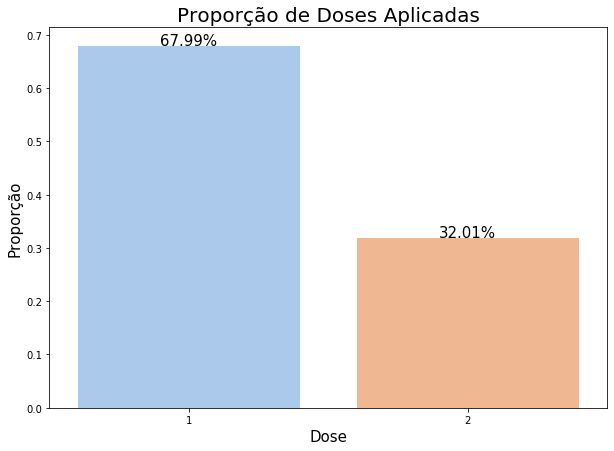

In [17]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "dose", y = "proporção", data = doses_proportion, ax = axis)

plt.title("Proporção de Doses Aplicadas", fontsize = 20)
plt.xlabel("Dose", fontsize = 15)
plt.ylabel("Proporção", fontsize = 15)

for index, row in doses_proportion.iterrows():
    axis.text(index, row["proporção"], "{:.2%}".format(row["proporção"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### we can infer that the first dose proportion is higher than the second now because half the adult population is now vaccinated.

In [18]:
doses_frequency = data["dose"].value_counts().reset_index()
doses_frequency.columns = ["dose", "frequência"]
doses_frequency.head()

,dose,frequência
0,1,1196552
1,2,563434


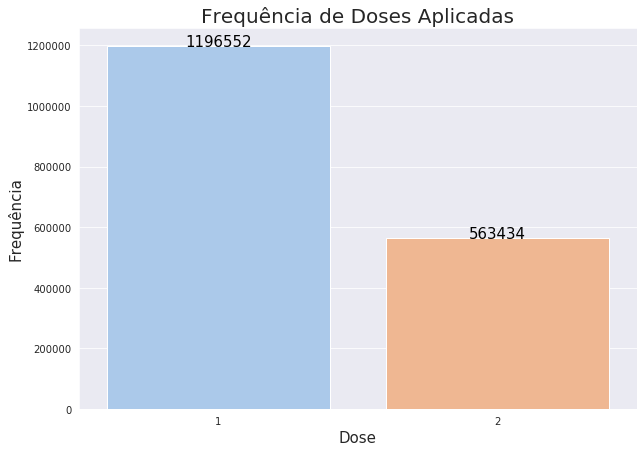

In [19]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "dose", y = "frequência", data = doses_frequency, ax = axis)

plt.title("Frequência de Doses Aplicadas", fontsize = 20)
plt.xlabel("Dose", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)

for index, row in doses_frequency.iterrows():
    axis.text(index, row["frequência"], "{}".format(row["frequência"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### absolute values of doses applied until today (09/07/2021).

### class vaccine

In [20]:
vaccines_proportion = data["vacina"].value_counts(normalize = True).reset_index()
vaccines_proportion.columns = ["vacina", "proporção"]
vaccines_proportion

,vacina,proporção
0,CHADOX1NCOV-19,0.469225
1,CORONAVAC,0.315249
2,COMIRNATY,0.181369
3,JANSSEN,0.034158


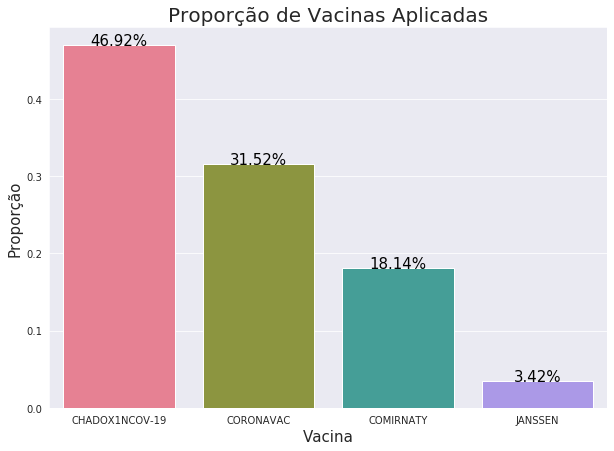

In [21]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("husl", 4))

sns.barplot(x = "vacina", y = "proporção", data = vaccines_proportion, ax = axis)

plt.title("Proporção de Vacinas Aplicadas", fontsize = 20)
plt.xlabel("Vacina", fontsize = 15)
plt.ylabel("Proporção", fontsize = 15)

for index, row in vaccines_proportion.iterrows():
    axis.text(index, row["proporção"], "{:.2%}".format(row["proporção"]), color = "black", ha = "center", fontsize = 15)

plt.show()

In [22]:
vaccines_frequency = data["vacina"].value_counts().reset_index()
vaccines_frequency.columns = ["vacina", "frequência"]
vaccines_frequency

,vacina,frequência
0,CHADOX1NCOV-19,825829
1,CORONAVAC,554833
2,COMIRNATY,319207
3,JANSSEN,60117


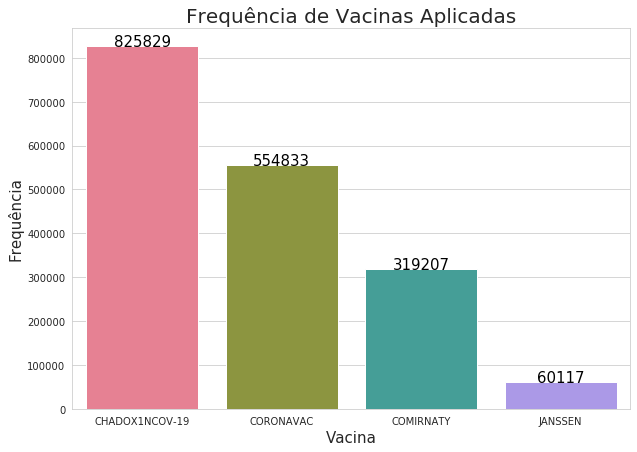

In [23]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("husl", 4))

sns.barplot(x = "vacina", y = "frequência", data = vaccines_frequency, ax = axis)

plt.title("Frequência de Vacinas Aplicadas", fontsize = 20)
plt.xlabel("Vacina", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)

for index, row in vaccines_frequency.iterrows():
    axis.text(index, row["frequência"], "{}".format(row["frequência"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### class group

In [24]:
groups_proportion = data["grupo"].value_counts(normalize = True).reset_index()
groups_proportion.columns = ["grupo", "proporção"]
groups_proportion.head()

,grupo,proporção
0,PÚBLICO EM GERAL (18 a 59 anos),0.402609
1,IDOSOS,0.304381
2,TRABALHADORES DA SAÚDE,0.119971
3,PESSOAS COM COMORBIDADES,0.065625
4,TRABALHADORES DA EDUCAÇÃO,0.047178


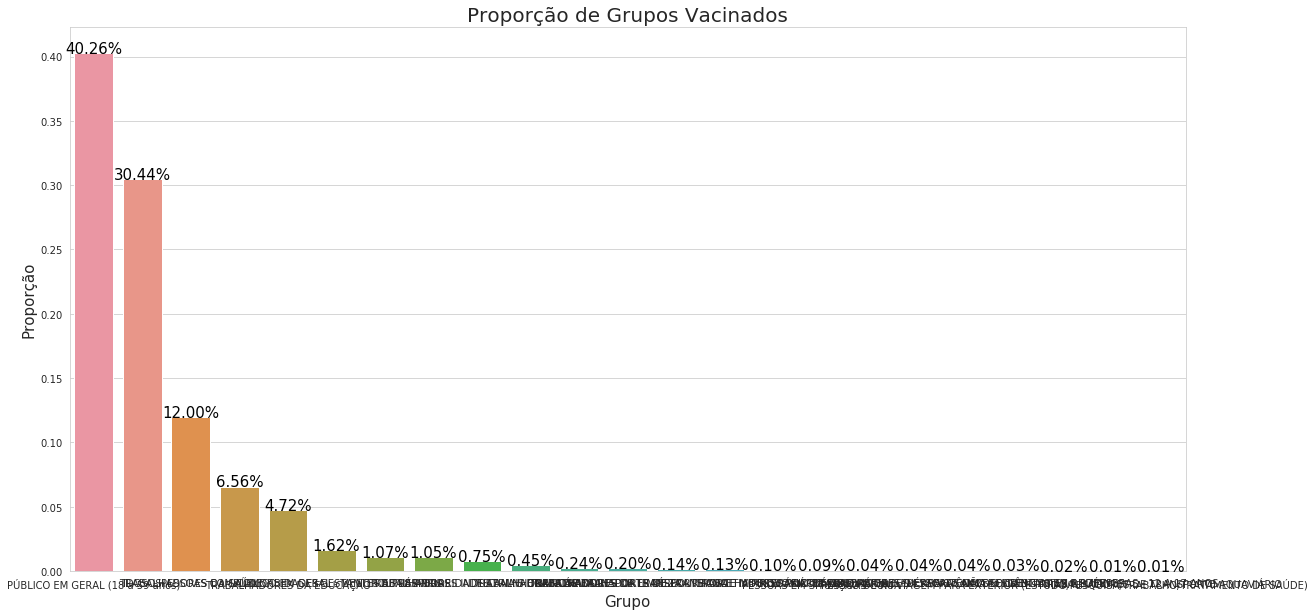

In [25]:
fig, axis = plt.subplots(figsize = (20, 10))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "grupo", y = "proporção", data = groups_proportion, ax = axis)

plt.title("Proporção de Grupos Vacinados", fontsize = 20)
plt.xlabel("Grupo", fontsize = 15)
plt.ylabel("Proporção", fontsize = 15)

for index, row in groups_proportion.iterrows():
    axis.text(index, row["proporção"], "{:.2%}".format(row["proporção"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### it would be better to show only the 4 most relevant groups, don't you think?

In [26]:
# 4 largest groups
relevant_groups = groups_proportion.nlargest(4, "proporção")

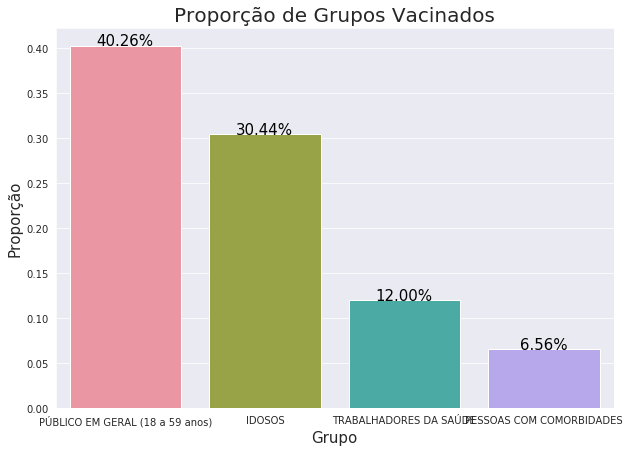

In [27]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "grupo", y = "proporção", data = relevant_groups, ax = axis)

plt.title("Proporção de Grupos Vacinados", fontsize = 20)
plt.xlabel("Grupo", fontsize = 15)
plt.ylabel("Proporção", fontsize = 15)

for index, row in relevant_groups.iterrows():
    axis.text(index, row["proporção"], "{:.2%}".format(row["proporção"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### doses linechart

In [28]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao,sexo
0,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,CHADOX1NCOV-19,1,26/07/2021,MASCULINO
1,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,2,04/03/2021,FEMININO
2,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,1,11/02/2021,FEMININO
3,***.405.524-**,PÚBLICO EM GERAL (18 a 59 anos),COMIRNATY,1,21/08/2021,FEMININO
4,***.695.200-**,IDOSOS,CORONAVAC,2,31/03/2021,MASCULINO


In [29]:
time_series = data

# ordering data by date
time_series["data_vacinacao"] = pd.to_datetime(time_series["data_vacinacao"])
time_series = time_series.sort_values(by = "data_vacinacao")

# creating a time series so we can plot a line chart
time_series = data.set_index("data_vacinacao")
time_series.head()

,cpf,grupo,vacina,dose,sexo
data_vacinacao,,,,,
2021-07-26,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,CHADOX1NCOV-19,1,MASCULINO
2021-04-03,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,2,FEMININO
2021-11-02,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,1,FEMININO
2021-08-21,***.405.524-**,PÚBLICO EM GERAL (18 a 59 anos),COMIRNATY,1,FEMININO
2021-03-31,***.695.200-**,IDOSOS,CORONAVAC,2,MASCULINO


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


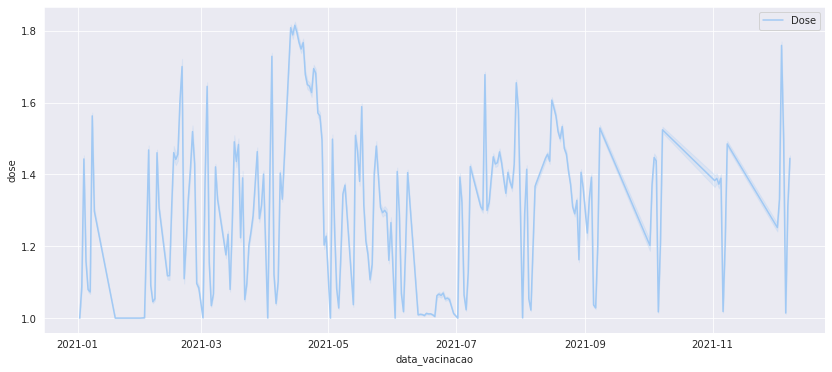

In [30]:
plt.figure(figsize=(14,6))

sns.lineplot(data = time_series["dose"], label = "Dose")

### that's not a good way to understand how the doses were managed, but we got a line chart, uhu?

# *groupwise analysis*

In [31]:
data.groupby("grupo").apply(lambda df: df["vacina"].value_counts().idxmax())

grupo
 PÚBLICO EM GERAL - MENOR DE 18 ANOS                                                    COMIRNATY
CAMINHONEIROS                                                                      CHADOX1NCOV-19
GESTANTES E PUÉRPERAS                                                                   COMIRNATY
GESTANTES E PUÉRPERAS - 12 A 17 ANOS                                                    COMIRNATY
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE                                          COMIRNATY
IDOSOS                                                                                  CORONAVAC
OUTRAS PRIORIDADES                                                                 CHADOX1NCOV-19
PESSOAS COM COMORBIDADES                                                           CHADOX1NCOV-19
PESSOAS COM COMORBIDADES - 12 A 17 ANOS                                                 COMIRNATY
PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS                                                  COMIRNATY
PESSOAS COM VI

### as we can see, the most used vaccine in Recife was CHADOX1NCOV-19 from the pharmaceutical and biotechnology company AstraZeneca.

In [32]:
average_doses = data.groupby("grupo").apply(lambda df: df["dose"].mean())
average_doses

grupo
 PÚBLICO EM GERAL - MENOR DE 18 ANOS                                               1.000000
CAMINHONEIROS                                                                      1.280015
GESTANTES E PUÉRPERAS                                                              1.333883
GESTANTES E PUÉRPERAS - 12 A 17 ANOS                                               1.000000
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE                                     1.228261
IDOSOS                                                                             1.477962
OUTRAS PRIORIDADES                                                                 1.375936
PESSOAS COM COMORBIDADES                                                           1.423666
PESSOAS COM COMORBIDADES - 12 A 17 ANOS                                            1.000000
PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS                                             1.000000
PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE S

In [33]:
average_doses.idxmax()

'IDOSOS'

### I checked above that the most vacinnated group are the elder group.